In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("Imports_Exports_Dataset.csv")
df.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction_ID   15000 non-null  object        
 1   Country          15000 non-null  object        
 2   Product          15000 non-null  object        
 3   Import_Export    15000 non-null  object        
 4   Quantity         15000 non-null  int64         
 5   Value            15000 non-null  float64       
 6   Date             15000 non-null  datetime64[ns]
 7   Category         15000 non-null  object        
 8   Port             15000 non-null  object        
 9   Customs_Code     15000 non-null  int64         
 10  Weight           15000 non-null  float64       
 11  Shipping_Method  15000 non-null  object        
 12  Supplier         15000 non-null  object        
 13  Customer         15000 non-null  object        
 14  Invoice_Number   15000 non-null  int64

In [4]:
df.describe()

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,15000.000000,15000.000000,15000.00000,15000.000000,1.500000e+04
mean,4980.554733,5032.931120,549507.95920,2492.118859,5.020677e+07
std,2866.166690,2857.593897,260886.91886,1451.378507,2.889888e+07
min,1.000000,102.120000,100041.00000,0.570000,4.202600e+04
25%,2517.000000,2552.750000,325635.50000,1243.482500,2.527742e+07
50%,4958.500000,5045.705000,545432.00000,2476.135000,5.026745e+07
75%,7458.250000,7504.700000,777988.00000,3747.392500,7.510045e+07
max,10000.000000,9999.130000,999964.00000,4999.930000,9.999799e+07


In [41]:
df["Date"] = df["Date"].astype("datetime64[ns]")

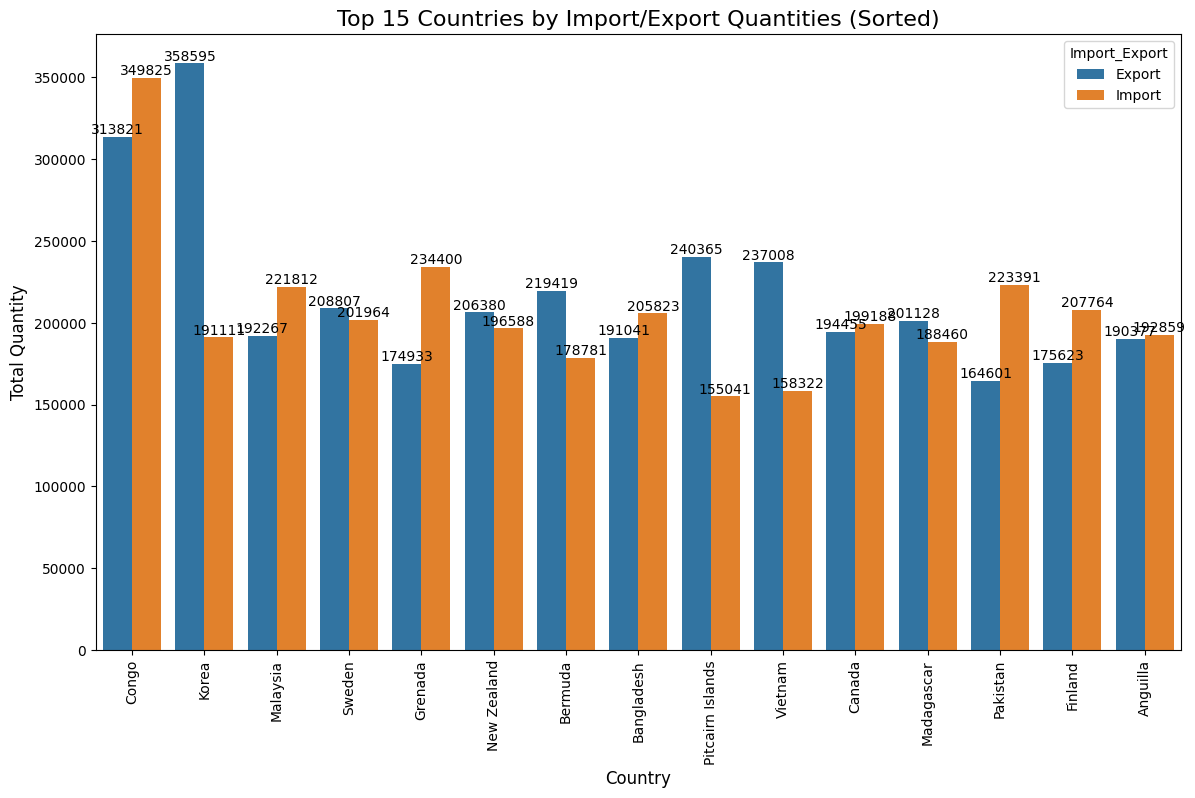

In [10]:


country_import_export = df.groupby(['Country', 'Import_Export'])['Quantity'].sum().reset_index()
total_quantity_per_country = country_import_export.groupby('Country')['Quantity'].sum().reset_index()

top_15_countries = total_quantity_per_country.sort_values(by='Quantity', ascending=False).head(15)

top_15_data = country_import_export[country_import_export['Country'].isin(top_15_countries['Country'])]

top_15_data = top_15_data.set_index('Country').loc[top_15_countries['Country']].reset_index()

plt.figure(figsize=(14, 8))

ax = sns.barplot(x='Country', y='Quantity', hue='Import_Export', data=top_15_data, order=top_15_countries['Country'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

plt.title('Top 15 Countries by Import/Export Quantities (Sorted)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.show()


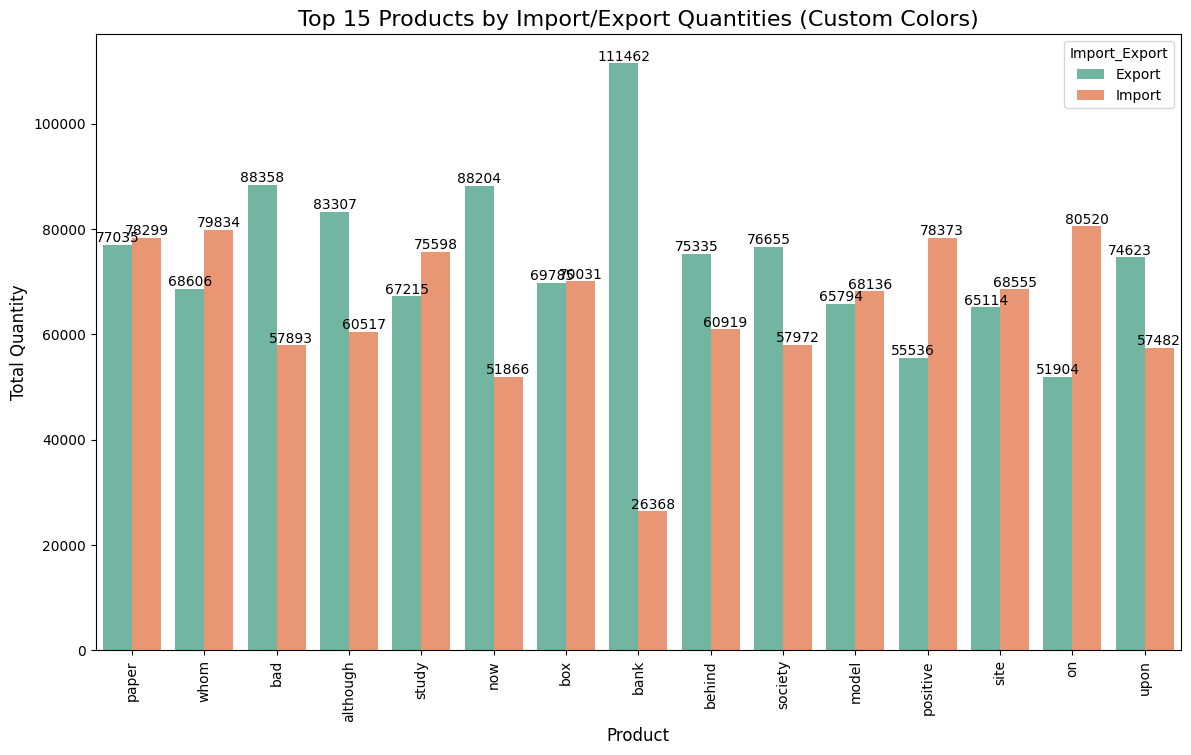

In [17]:

product_import_export = df.groupby(['Product', 'Import_Export'])['Quantity'].sum().reset_index()

# Calculate the total quantity for each product (summing both Import and Export)
total_quantity_per_product = product_import_export.groupby('Product')['Quantity'].sum().reset_index()

# Sort the total quantity and select the top 15 products
top_15_products = total_quantity_per_product.sort_values(by='Quantity', ascending=False).head(15)

# Merge back to get both Import and Export quantities for these top 15 products
top_15_data = product_import_export[product_import_export['Product'].isin(top_15_products['Product'])]

# Sort top_15_data by the total quantity per product, to keep the plot sorted
top_15_data = top_15_data.set_index('Product').loc[top_15_products['Product']].reset_index()


plt.figure(figsize=(14, 8))

# Define custom colors for import and export bars
custom_palette = {
    'Import': 'skyblue',   # Color for Import bars
    'Export': 'lightgreen' # Color for Export bars
}

ax = sns.barplot(x='Product', y='Quantity', hue='Import_Export', data=top_15_data, order=top_15_products['Product'], palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Top 15 Products by Import/Export Quantities (Custom Colors)', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.show()


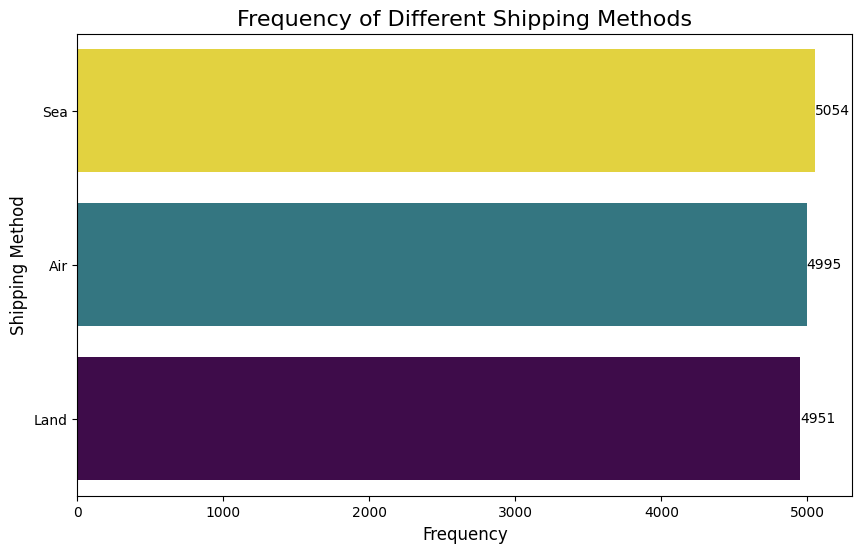

In [23]:

shipping_method_counts = df['Shipping_Method'].value_counts().reset_index()
shipping_method_counts.columns = ['Shipping_Method', 'Frequency']

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot for the shipping methods
ax = sns.barplot(x='Frequency', y='Shipping_Method', data=shipping_method_counts,hue='Frequency', palette='viridis',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
# Set plot title and labels
plt.title('Frequency of Different Shipping Methods', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Shipping Method', fontsize=12)

# Show the plot
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\3895842965.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Value', y='Country', data=top_countries_by_value, palette='Oranges_d',legend=False)


<Figure size 1400x800 with 0 Axes>

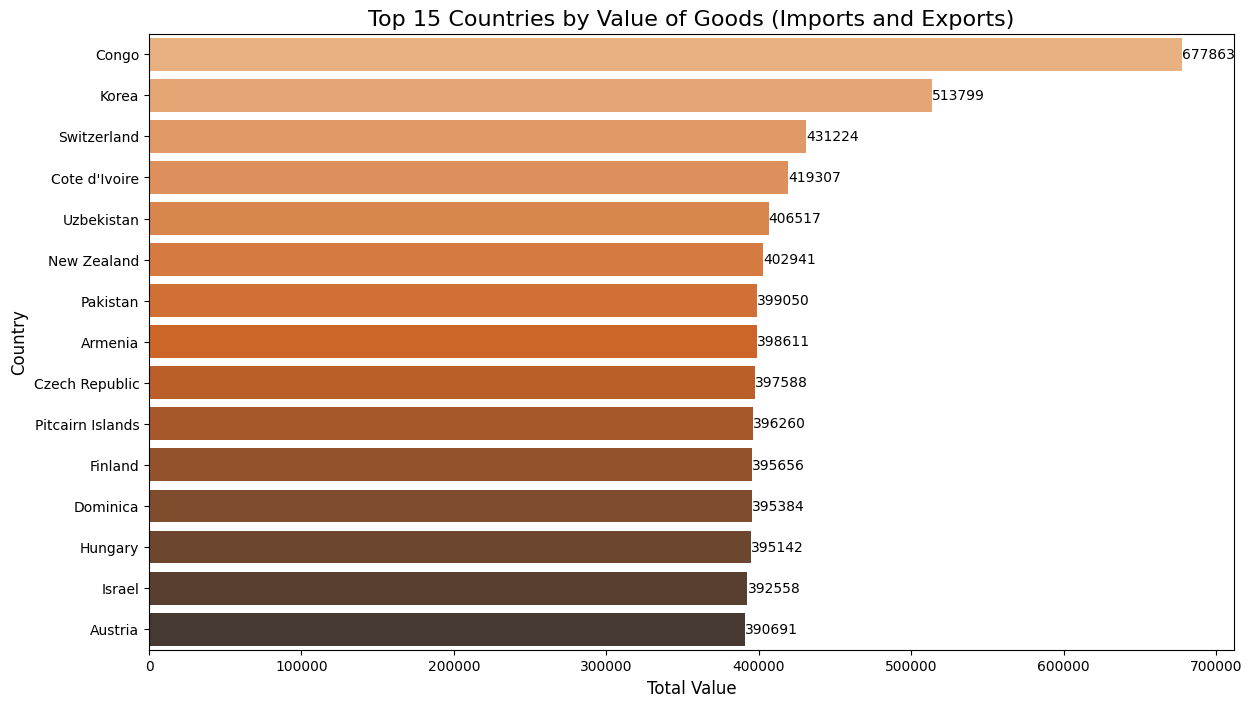

In [33]:


# Grouping the data by country and summing the quantities and values
country_summary = df.groupby(['Country', 'Import_Export'])[['Quantity', 'Value']].sum().reset_index()


top_countries_by_value = country_summary.groupby('Country')['Value'].sum().reset_index().sort_values(by='Value', ascending=False).head(15)

# Set the plot size for Quantity
plt.figure(figsize=(14, 8))


# Set the plot size for Value
plt.figure(figsize=(14, 8))

# Create a bar plot for the top countries by value
ax = sns.barplot(x='Value', y='Country', data=top_countries_by_value, palette='Oranges_d',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
# Set plot title and labels
plt.title('Top 15 Countries by Value of Goods (Imports and Exports)', fontsize=16)
plt.xlabel('Total Value', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\275081642.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Quantity', y='Country', data=top_countries_by_quantity, palette='Blues_d')


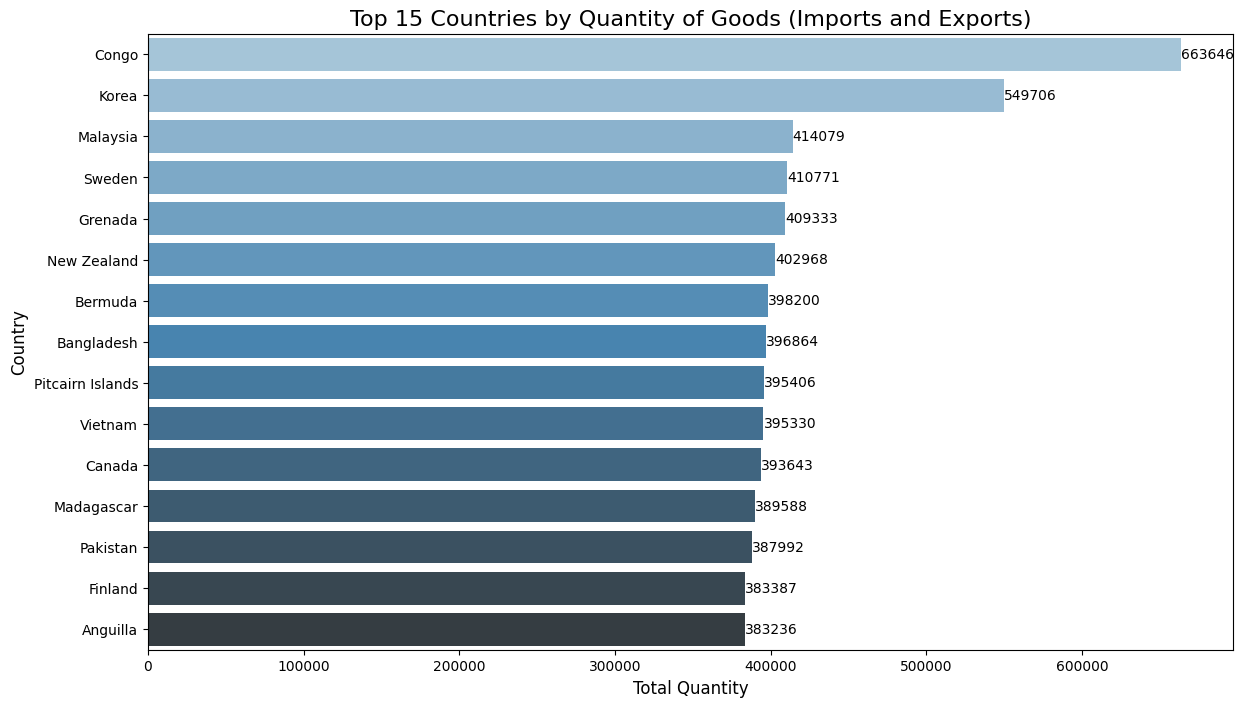

In [32]:


# Grouping the data by country and summing the quantities and values
country_summary = df.groupby(['Country', 'Import_Export'])[['Quantity', 'Value']].sum().reset_index()


top_countries_by_quantity = country_summary.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(15)

# Set the plot size for Quantity
plt.figure(figsize=(14, 8))

# Create a bar plot for the top countries by quantity
ax = sns.barplot(x='Quantity', y='Country', data=top_countries_by_quantity, palette='Blues_d')
for bars in ax.containers:
    ax.bar_label(bars)
# Set plot title and labels
plt.title('Top 15 Countries by Quantity of Goods (Imports and Exports)', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.show()




C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\2688793375.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Quantity', y='Product', data=top_products_by_quantity, palette='deep')


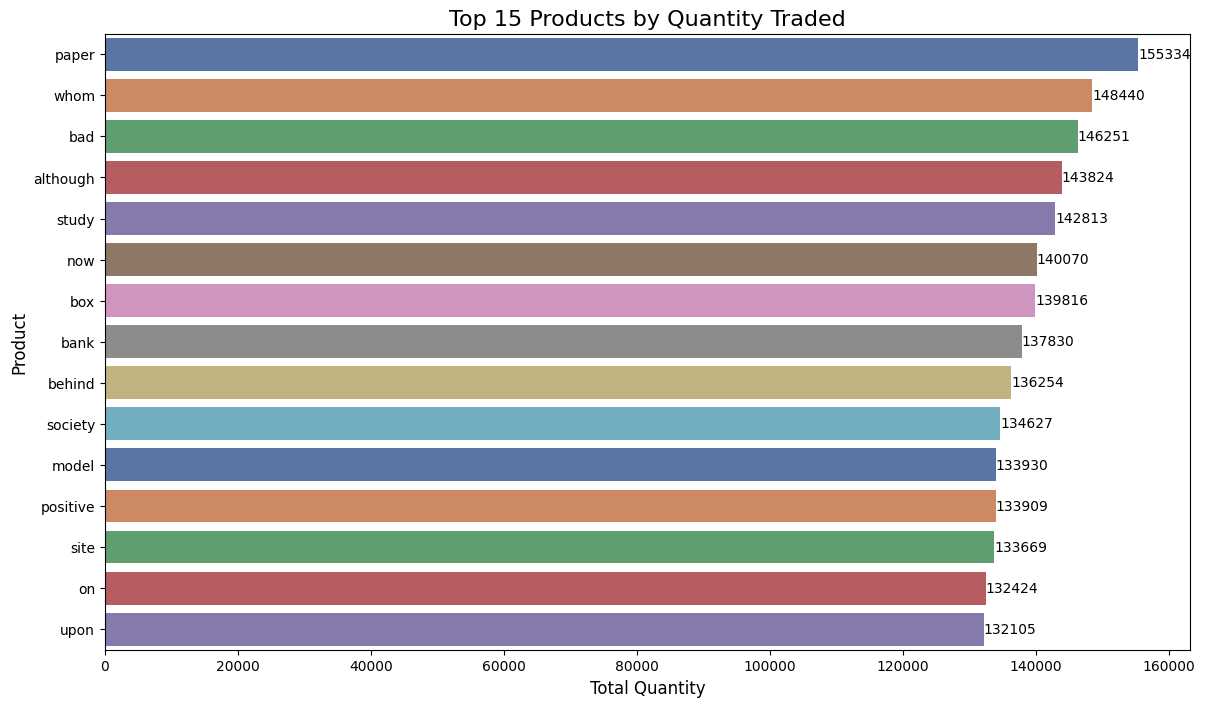

In [35]:

# Grouping the data by Product and summing the quantities and values
product_summary = df.groupby('Product')[['Quantity', 'Value']].sum().reset_index()

# Finding the top products by quantity and value
top_products_by_quantity = product_summary.sort_values(by='Quantity', ascending=False).head(15)

# Set the plot size for Quantity
plt.figure(figsize=(14, 8))

# Create a bar plot for the top products by quantity
ax = sns.barplot(x='Quantity', y='Product', data=top_products_by_quantity, palette='deep')
for bars in ax.containers:
    ax.bar_label(bars)
# Set plot title and labels
plt.title('Top 15 Products by Quantity Traded', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Show the plot
plt.show()




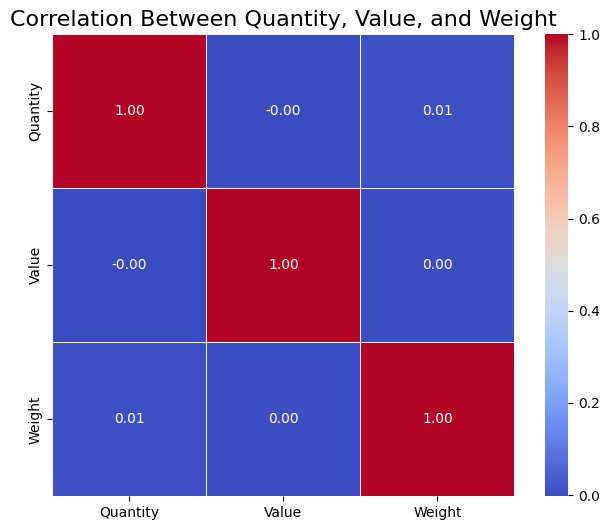

In [38]:


correlation_data = df[['Quantity', 'Value', 'Weight']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set the plot size
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)

# Set plot title
plt.title('Correlation Between Quantity, Value, and Weight', fontsize=16)

# Show the plot
plt.show()


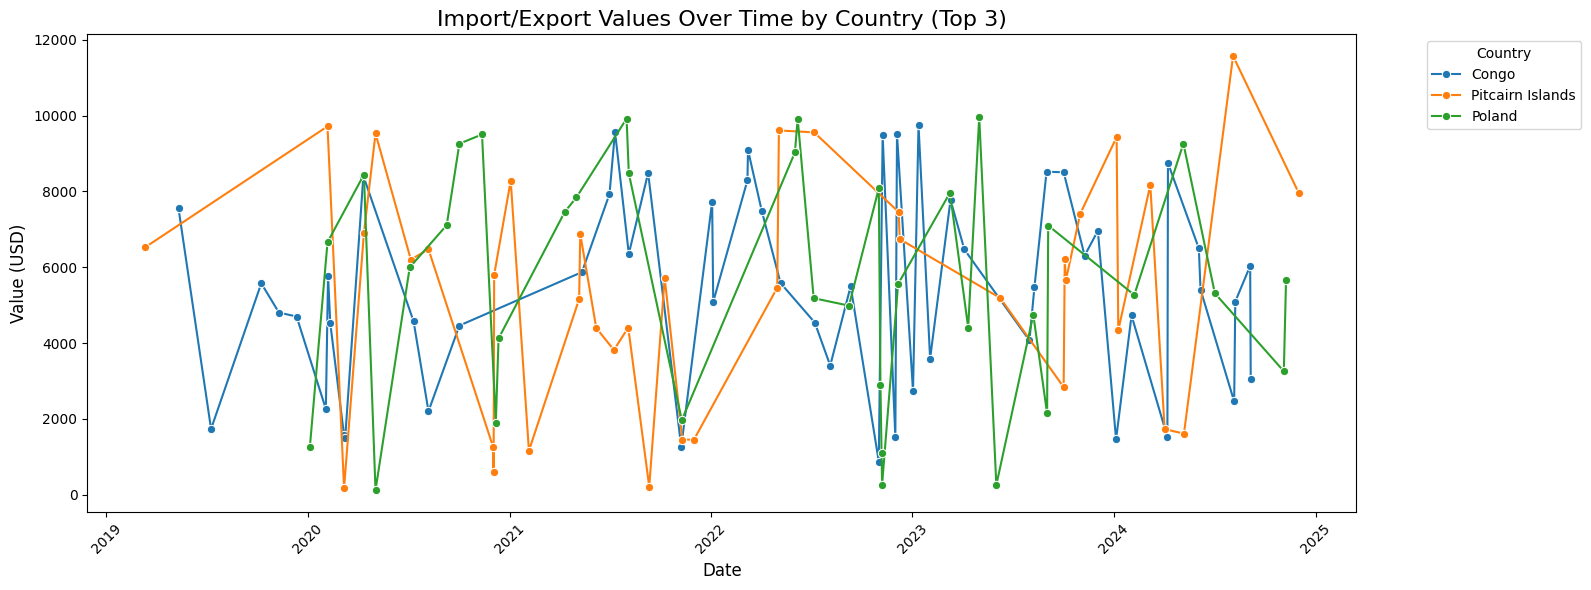

In [53]:

# Convert the Date column to datetime format with error handling
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create separate DataFrames for imports and exports
import_data = df[df['Import_Export'] == 'Import']
export_data = df[df['Import_Export'] == 'Export']

# Combine the two dataframes
combined_data = pd.concat([import_data, export_data])

# Grouping data by country and summing the values
country_trend = combined_data.groupby(['Country', 'Date']).agg({'Value': 'sum'}).reset_index()

# Get the total value for each country to find the top 15
top_countries = country_trend.groupby('Country')['Value'].sum().nlargest(3).index

# Filter for the top 15 countries
top_country_trend = country_trend[country_trend['Country'].isin(top_countries)]

# Set the plot size
plt.figure(figsize=(16, 6))

# Plotting
sns.lineplot(data=top_country_trend, x='Date', y='Value', hue='Country', palette='tab10', marker='o')

# Customize the plot
plt.title('Import/Export Values Over Time by Country (Top 3)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



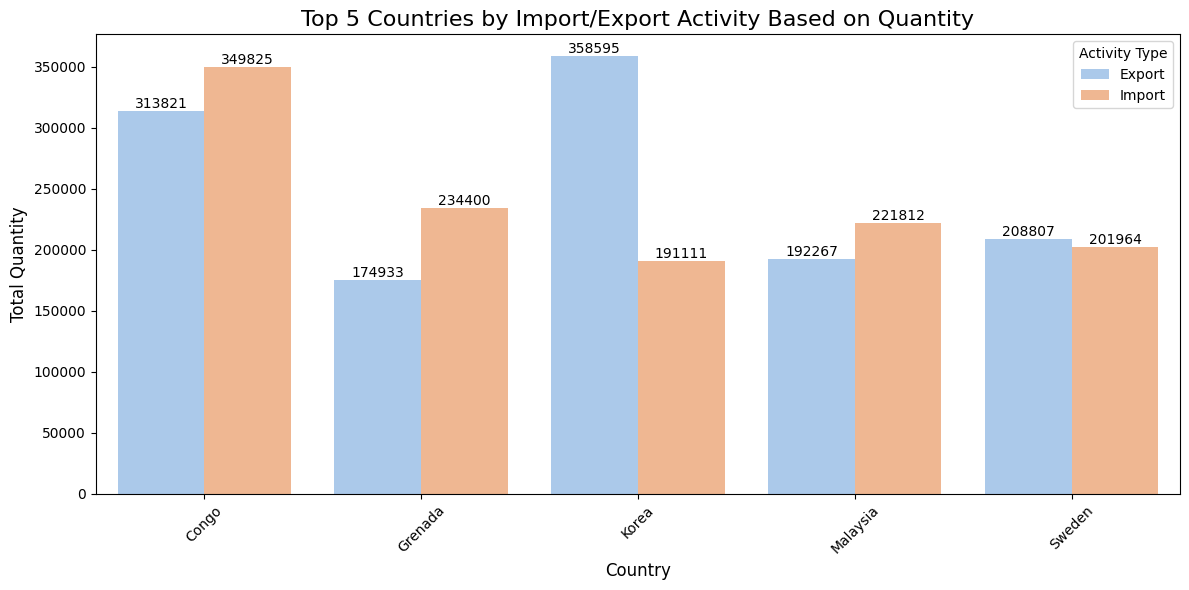

In [56]:



# Create separate DataFrames for imports and exports
import_data = df[df['Import_Export'] == 'Import']
export_data = df[df['Import_Export'] == 'Export']

# Combine the two dataframes
combined_data = pd.concat([import_data, export_data])

# Grouping data by country and Import/Export type, summing the quantities
country_activity = combined_data.groupby(['Country', 'Import_Export']).agg({'Quantity': 'sum'}).reset_index()

# Get the total quantity for each country to find the top 5
top_countries = country_activity.groupby('Country')['Quantity'].sum().nlargest(5).index

# Filter for the top 5 countries
top_country_activity = country_activity[country_activity['Country'].isin(top_countries)]

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn
ax = sns.barplot(data=top_country_activity, x='Country', y='Quantity', hue='Import_Export', palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)
# Customize the plot
plt.title('Top 5 Countries by Import/Export Activity Based on Quantity', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Activity Type')

# Show the plot
plt.tight_layout()
plt.show()



C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\4015318539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')


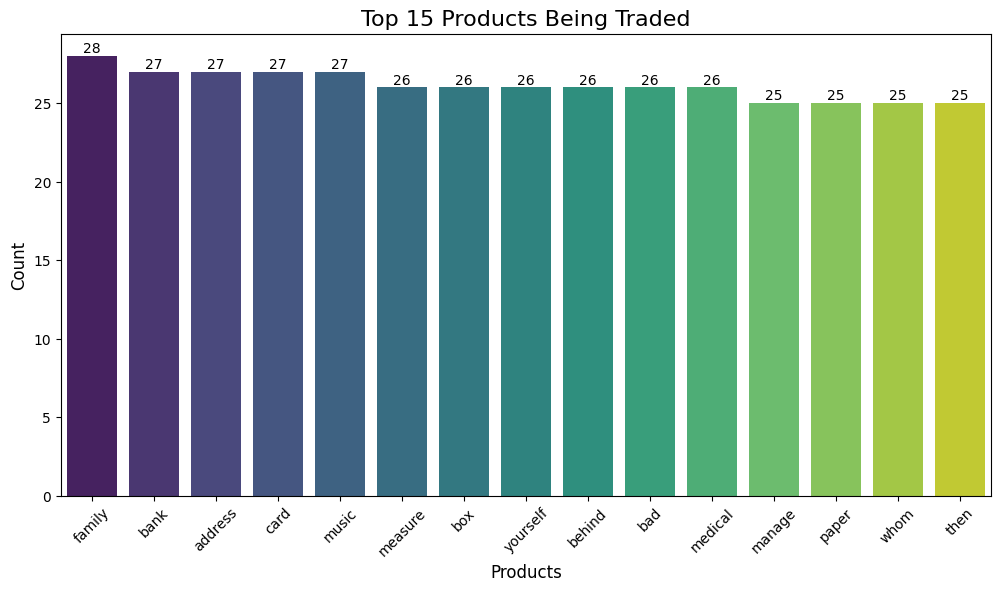

In [59]:

product_counts = df['Product'].value_counts().head(15)

# Create bar plot for products
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 15 Products Being Traded', fontsize=16)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\2722214072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')


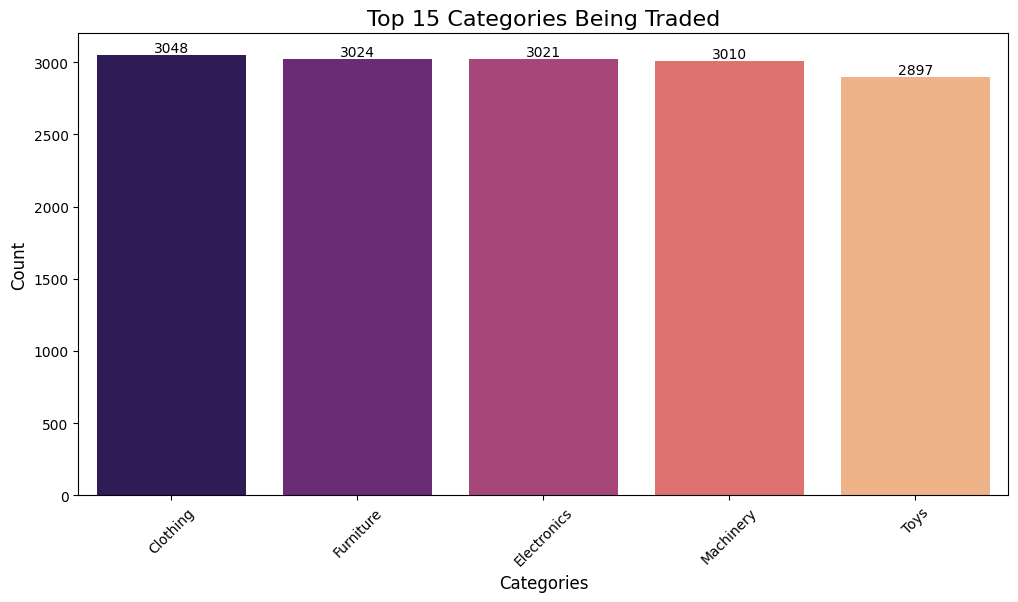

In [67]:

category_counts = df['Category'].value_counts().head(15)

# Create bar plot for categories
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 15 Categories Being Traded', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\438065735.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Category', data=category_summary, palette='Oranges_d')


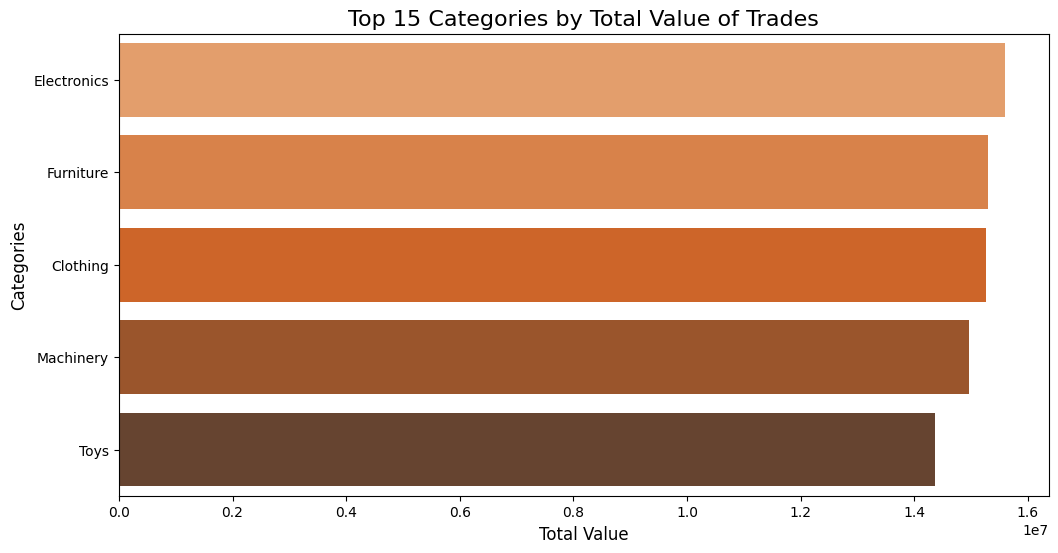

In [69]:

product_summary = df.groupby('Product').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Aggregate total quantity and value by Category
category_summary = df.groupby('Category').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Sort by Quantity and Value for better visualization
product_summary = product_summary.sort_values(by='Value', ascending=False).head(15)
category_summary = category_summary.sort_values(by='Value', ascending=False).head(15)
# Create bar plot for categories based on total value
plt.figure(figsize=(12, 6))
sns.barplot(x='Value', y='Category', data=category_summary, palette='Oranges_d')
plt.title('Top 15 Categories by Total Value of Trades', fontsize=16)
plt.xlabel('Total Value', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.show()

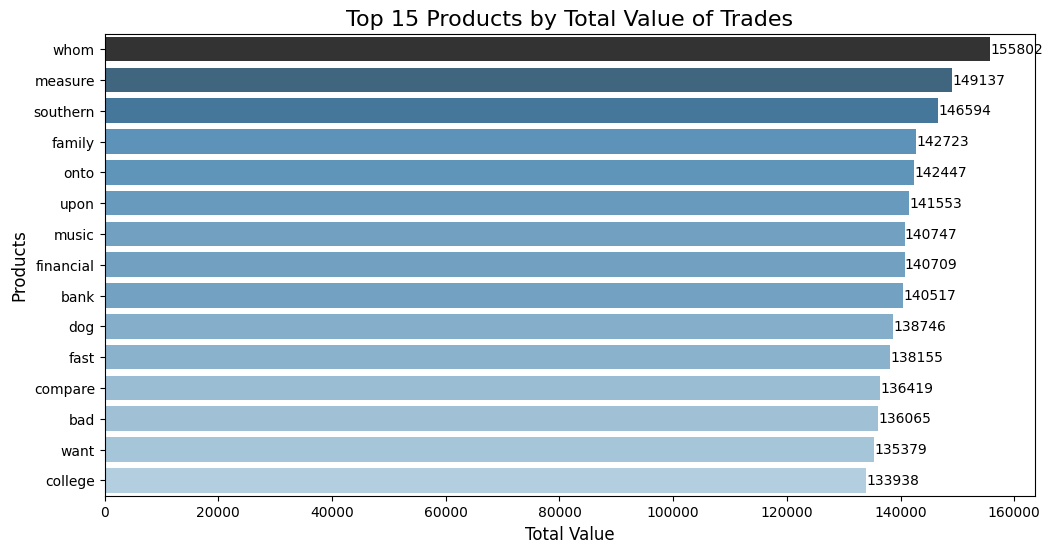

In [71]:
product_summary = df.groupby('Product').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Aggregate total quantity and value by Category
category_summary = df.groupby('Category').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Sort by Quantity and Value for better visualization
product_summary = product_summary.sort_values(by='Value', ascending=False).head(15)
category_summary = category_summary.sort_values(by='Value', ascending=False).head(15)
# Create bar plot for products based on total value
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Value', y='Product', data=product_summary,hue='Value', palette='Blues_d',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 15 Products by Total Value of Trades', fontsize=16)
plt.xlabel('Total Value', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.show()

C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\1131786614.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Quantity', y='Product', data=product_summary, palette='Greens_d')


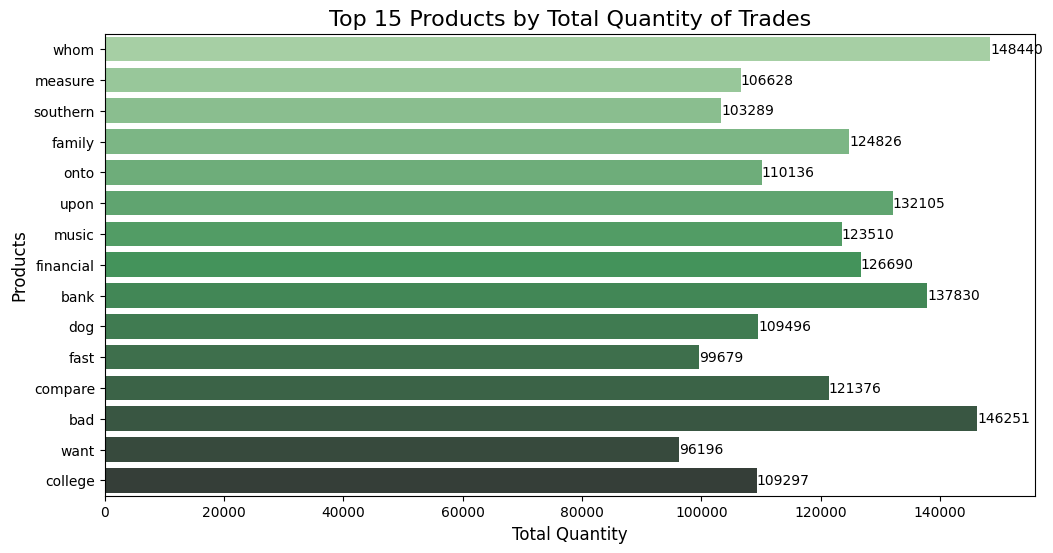

In [72]:
product_summary = df.groupby('Product').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Aggregate total quantity and value by Category
category_summary = df.groupby('Category').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Sort by Quantity and Value for better visualization
product_summary = product_summary.sort_values(by='Value', ascending=False).head(15)
category_summary = category_summary.sort_values(by='Value', ascending=False).head(15)
# Create bar plot for products based on total quantity
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Quantity', y='Product', data=product_summary, palette='Greens_d')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 15 Products by Total Quantity of Trades', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.show()

C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\1040969053.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Category', data=category_summary, palette='Purples_d')


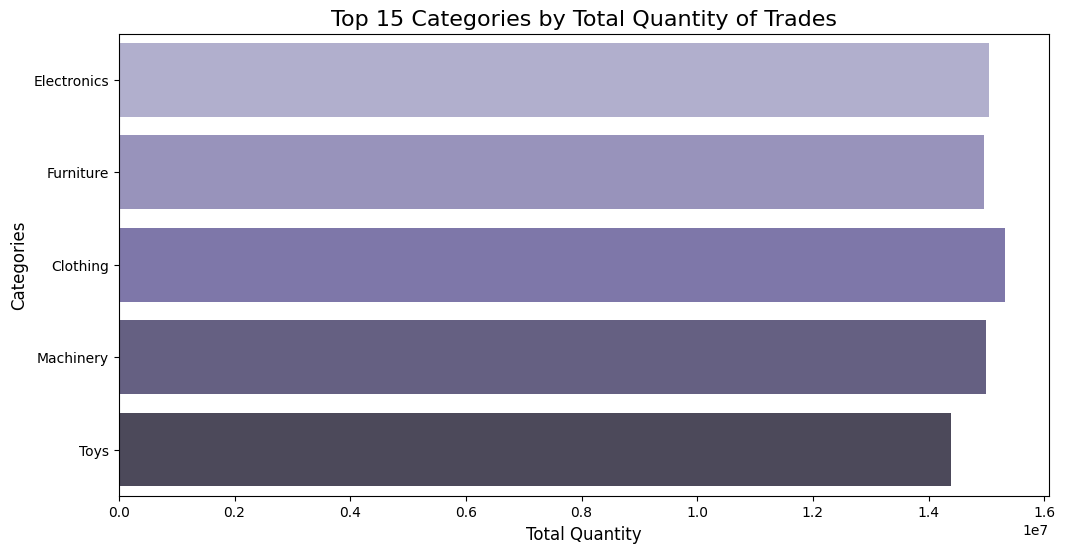

In [64]:
product_summary = df.groupby('Product').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Aggregate total quantity and value by Category
category_summary = df.groupby('Category').agg({'Quantity': 'sum', 'Value': 'sum'}).reset_index()

# Sort by Quantity and Value for better visualization
product_summary = product_summary.sort_values(by='Value', ascending=False).head(15)
category_summary = category_summary.sort_values(by='Value', ascending=False).head(15)



# Create bar plot for categories based on total quantity
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Category', data=category_summary, palette='Purples_d')
plt.title('Top 15 Categories by Total Quantity of Trades', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.show()



C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\1222548014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipping_Method', y='Weight', data=df, palette='Set3')


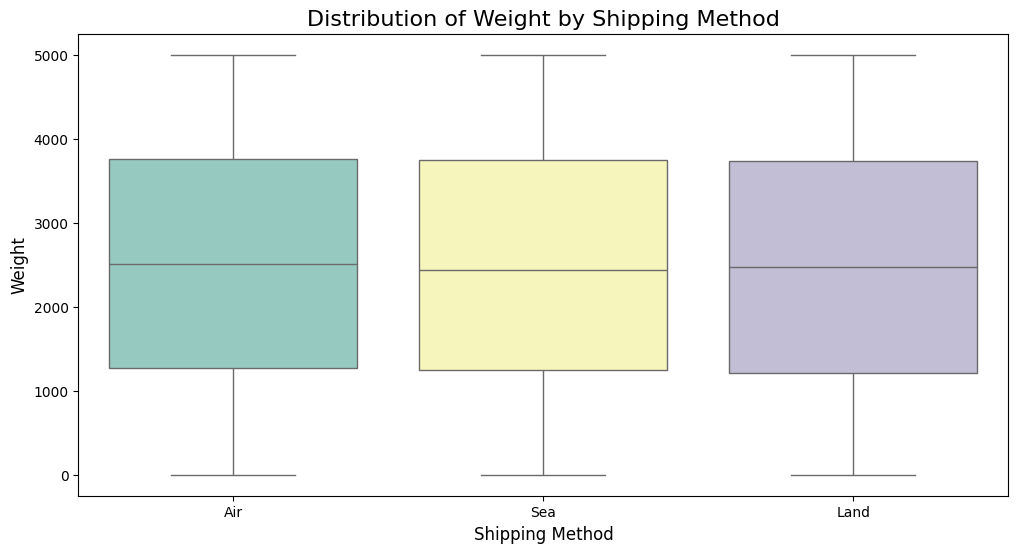

In [73]:

# Box plot for Weight by Shipping Method
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipping_Method', y='Weight', data=df, palette='Set3')
plt.title('Distribution of Weight by Shipping Method', fontsize=16)
plt.xlabel('Shipping Method', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.show()

C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\2961330574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipping_Method', y='Value', data=df, palette='Set2')


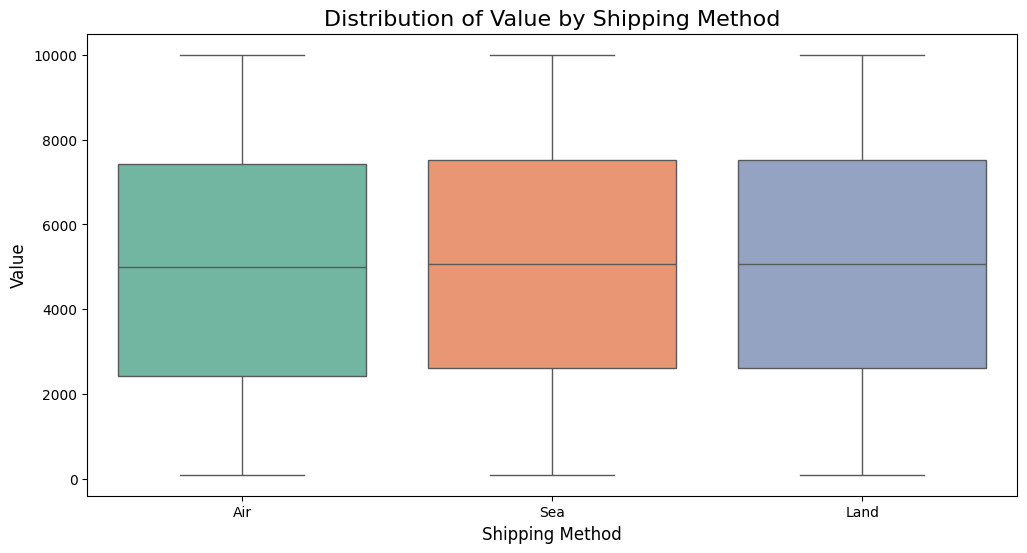

In [74]:
# Box plot for Value by Shipping Method
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipping_Method', y='Value', data=df, palette='Set2')
plt.title('Distribution of Value by Shipping Method', fontsize=16)
plt.xlabel('Shipping Method', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\2714169270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Shipping_Method', y='Weight', data=average_weight, palette='magma')


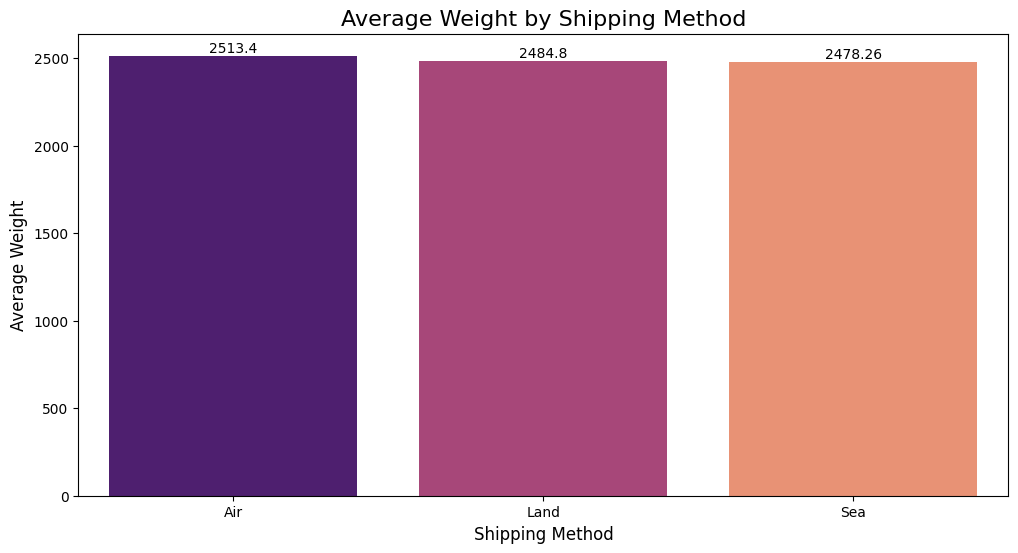

In [83]:
# Bar plot for average Weight by Shipping Method
average_weight = df.groupby('Shipping_Method')['Weight'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Shipping_Method', y='Weight', data=average_weight, palette='magma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Weight by Shipping Method', fontsize=16)
plt.xlabel('Shipping Method', fontsize=12)
plt.ylabel('Average Weight', fontsize=12)
plt.show()

C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_16088\1920239217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Shipping_Method', y='Value', data=average_value, palette='magma')


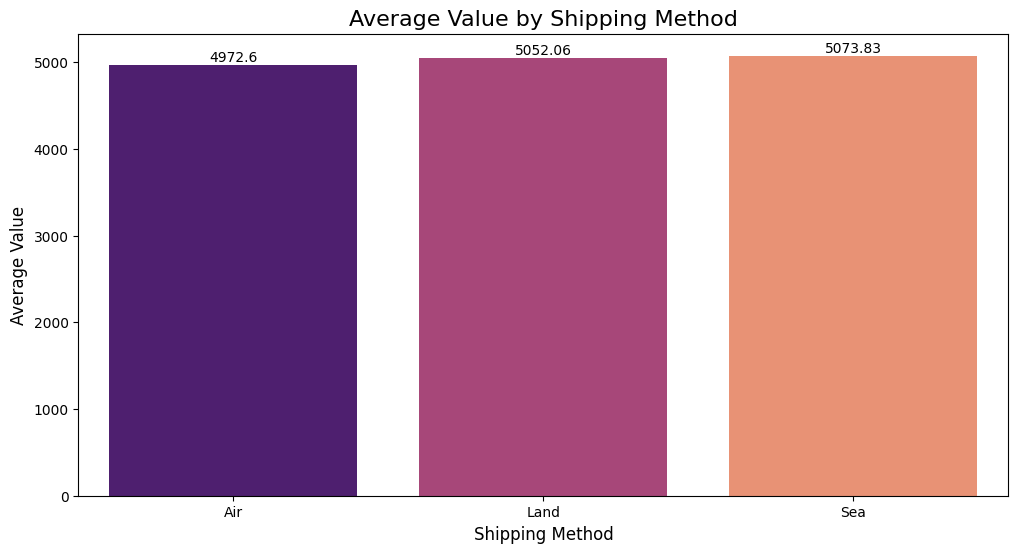

In [84]:
# Bar plot for average Value by Shipping Method
average_value = df.groupby('Shipping_Method')['Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Shipping_Method', y='Value', data=average_value, palette='magma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Value by Shipping Method', fontsize=16)
plt.xlabel('Shipping Method', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.show()


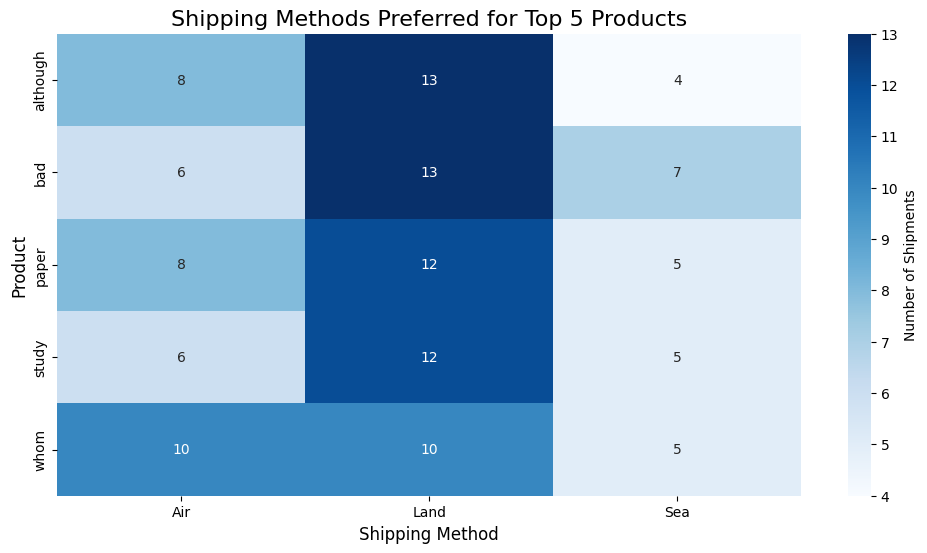

In [88]:


top_products = df.groupby('Product')['Quantity'].sum().nlargest(5).index.tolist()

# Step 2: Filter DataFrame for top products
top_products_df = df[df['Product'].isin(top_products)]

# Step 3: Count occurrences of each Shipping Method for each top Product
shipping_counts_top = top_products_df.groupby(['Product', 'Shipping_Method']).size().unstack(fill_value=0)

# Step 4: Plotting a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(shipping_counts_top, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Shipments'})
plt.title('Shipping Methods Preferred for Top 5 Products', fontsize=16)
plt.xlabel('Shipping Method', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()





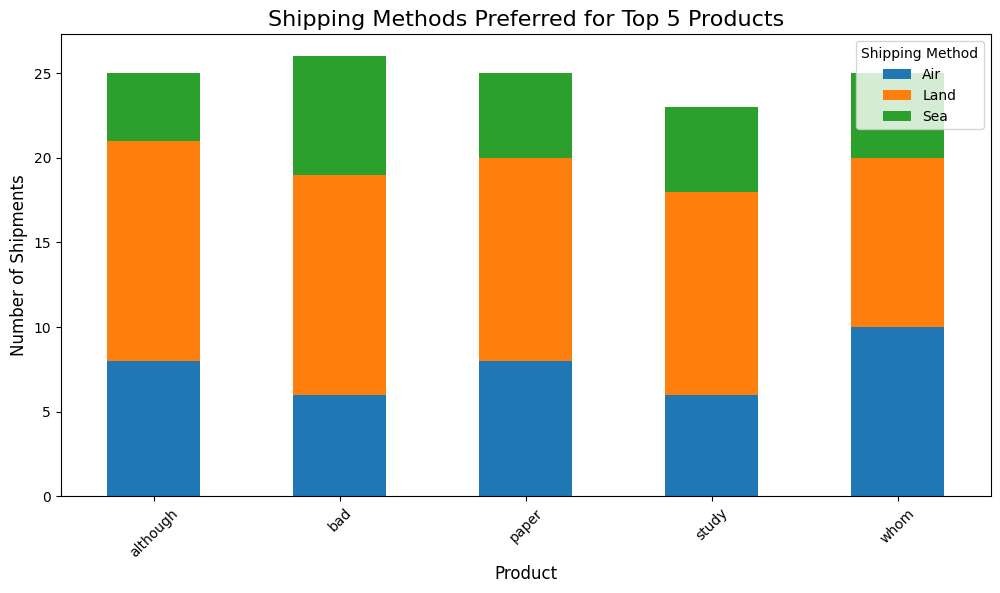

In [87]:
top_products = df.groupby('Product')['Quantity'].sum().nlargest(5).index.tolist()

# Step 2: Filter DataFrame for top products
top_products_df = df[df['Product'].isin(top_products)]

# Step 3: Count occurrences of each Shipping Method for each top Product
shipping_counts_top = top_products_df.groupby(['Product', 'Shipping_Method']).size().unstack(fill_value=0)
# Step 5: Bar Plot for better visualization
shipping_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Shipping Methods Preferred for Top 5 Products', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.legend(title='Shipping Method')
plt.xticks(rotation=45)
plt.show()


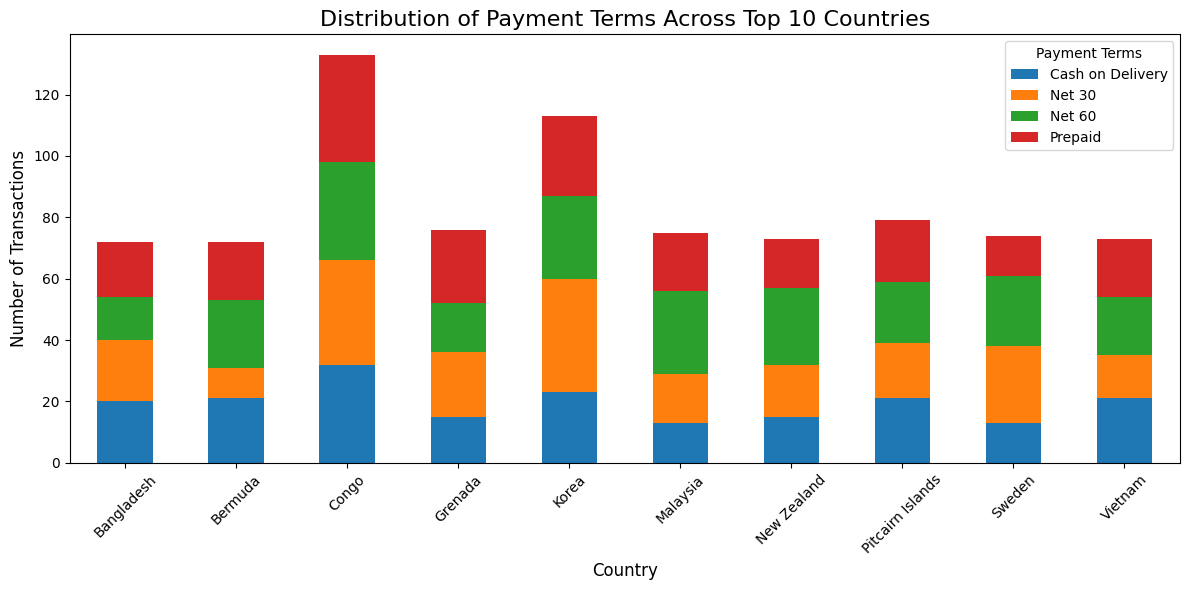

In [89]:


# Step 1: Calculate total quantities for each country
top_countries = df.groupby('Country')['Quantity'].sum().nlargest(10).index.tolist()

# Step 2: Filter DataFrame for top countries
top_countries_df = df[df['Country'].isin(top_countries)]

# Step 3: Count occurrences of each Payment Term for each top Country
payment_counts_top = top_countries_df.groupby(['Country', 'Payment_Terms']).size().unstack(fill_value=0)

# Step 4: Plotting a bar plot
payment_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Payment Terms Across Top 10 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Payment Terms')
plt.tight_layout()
plt.show()


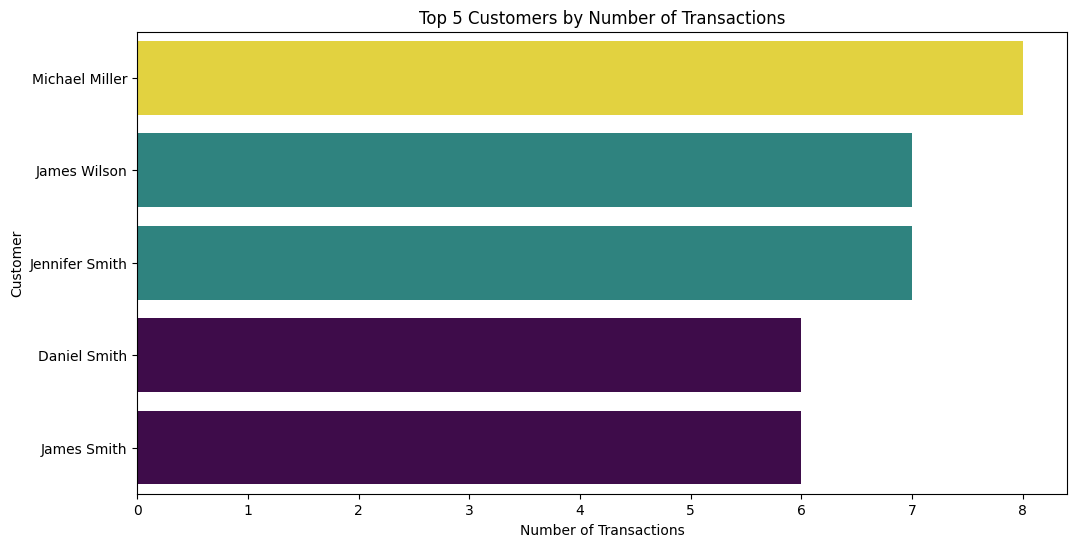

In [99]:
# Step 2: Count transactions for customers
customer_transactions = df['Customer'].value_counts().reset_index()
customer_transactions.columns = ['Customer', 'Number_of_Transactions']

top_customers = customer_transactions.sort_values(by='Number_of_Transactions', ascending=False).head(5)
# Bar plot for Top 5 Customers
plt.figure(figsize=(12, 6))
sns.barplot(x='Number_of_Transactions', y='Customer', data=top_customers,hue='Number_of_Transactions', palette='viridis',legend=False)
plt.title('Top 5 Customers by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer')
plt.show()


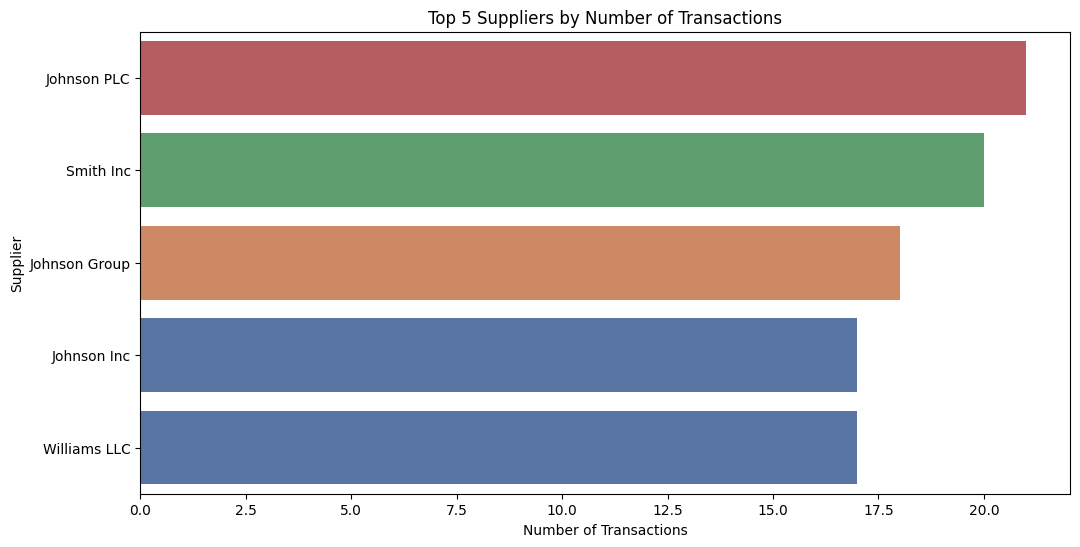

In [97]:

# Step 1: Count transactions for suppliers
supplier_transactions = df['Supplier'].value_counts().reset_index()
supplier_transactions.columns = ['Supplier', 'Number_of_Transactions']



# Step 3: Sort and get top 5 results
top_suppliers = supplier_transactions.sort_values(by='Number_of_Transactions', ascending=False).head(5)


# Step 4: Plotting

# Bar plot for Top 5 Suppliers
plt.figure(figsize=(12, 6))
sns.barplot(x='Number_of_Transactions', y='Supplier', data=top_suppliers,hue='Number_of_Transactions', palette='deep',legend=False)
plt.title('Top 5 Suppliers by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Supplier')
plt.show()
